# Making Batch Predictions with Graphs

In [1]:
from ml4pd import components
from ml4pd.flowsheet import Flowsheet
from ml4pd.streams import MaterialStream
from ml4pd.aspen_units import Distillation
import numpy as np

## Specify Molecules in System

As explained in [Making a Single Prediction](1_one_instance_prediction.ipynb), the participating molecules must first be specified.

In [2]:
components.set_components(['acetone', '2-butanone'])

## Build Graph

For larger process models, the user might want to first build out the model before feeding in data. `Flowsheet` can support this to a certain extend (can only handle tree-like structures with one root node at the moment).

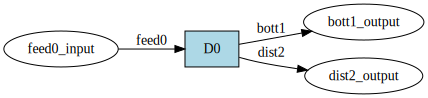

In [3]:
feed = MaterialStream()
dist_col = Distillation()

bott, dist = dist_col(feed)

flowsheet = Flowsheet(input_streams=[feed], output_streams=[bott, dist])
flowsheet.plot_model()

`Streams` and `UnitOp` objects automatically assign an id to every initiliazed instance. Here, `D0` is the id of `dist_col` and `feed0`, `bott`, `dist2` are the ids of `feed`, `bott` and `dist` respectively. User can also specify the id of instances upon initiliazaiton via `object_id`.

In [4]:
feed_stream = MaterialStream(object_id="feed_stream")
feed_stream

MaterialStream(object_id='feed_stream', before=None, after=None, check_data=True, verbose=False, stream_type='feed', pressure_units='atm', flowrates_units='kmol/hr', temperature_units='degC')

## Feed Data to Graph

Data can be fed to individual node via a nested dictionary passed to `Flowsheet`.

In [5]:
feed_data = dict(

    molecules = {
        "name_A": ['acetone'] * 5,
        "name_B": ["2-butanone"] * 5
    },
    flowrates = {
        "flowrate_A": np.linspace(0.1, 1, 5).tolist(),
        "flowrate_B": np.linspace(0.1, 1, 5).tolist()
    },
    vapor_fraction = [0] * 5,
    pressure = np.linspace(0.1, 5, 5).tolist(),
)

col_data = dict(
    no_stages = np.arange(5, 20, 3).tolist(),
    pressure = np.linspace(0.1, 5, 5).tolist(),
    reflux_ratio = np.linspace(5, 15, 5).tolist(),
    boilup_ratio = np.linspace(10, 15, 5).tolist()
)

input_data = {
    "feed0": feed_data,
    'D0': col_data
}

flowsheet.run(inputs=input_data)

c:\users\hvo\desktop\ml4pd\ml4pd\aspen_unit_ops\distillation.py:160: UserWarning: feed_stage not specified, setting it equal to half no_stages.
  self._check_feed_stage()


## Inspect Results

In [6]:
bott.flow

,flowrate_A,flowrate_B
0,0.011202,0.071821
1,0.025705,0.263926
2,0.049175,0.486160
3,0.078453,0.699710
4,0.097979,0.900540


In [7]:
dist_col.reboiler_duty

[25122.243568573776,
 104937.15072332504,
 202456.03258323885,
 309232.84900782304,
 454447.95065304945]